# **K-Means Clustering using Python from Scratch**

### **What is clustering in Machine Learning?**
Clustering is a technique used in machine learning to group similar objects or data points together in a way that maximizes the similarity within groups and minimizes the similarity between different groups. It is an unsupervised learning technique, meaning that there are no predefined labels or categories for the data.

In clustering, a set of data points are represented as a mathematical model, and the algorithm tries to find patterns and groupings in the data based on the similarity between the points. The goal is to identify meaningful structures and relationships within the data that can help us better understand it.

There are different types of clustering algorithms, such as K-means, hierarchical clustering, and density-based clustering. Each of these algorithms has its own strengths and weaknesses, and the choice of algorithm depends on the nature of the data and the specific problem at hand.

Clustering has many applications, such as customer segmentation, image segmentation, anomaly detection, and more.

### **What are the different types of Clustering techniques are available?**
There are several types of clustering techniques available in machine learning, and some of the most common ones include:

* **K-means clustering:** This is a popular clustering algorithm that aims to partition a dataset into K clusters, where K is a predefined number. The algorithm iteratively assigns data points to clusters based on their distance from the centroid of each cluster.

* **Hierarchical clustering:** This is a clustering technique that creates a hierarchy of clusters based on the similarity between data points. It can be divided into two types: agglomerative clustering and divisive clustering.

* **Density-based clustering:** This clustering technique groups together data points that are close together in terms of their density. Examples of density-based clustering algorithms include DBSCAN (Density-Based Spatial Clustering of Applications with Noise) and OPTICS (Ordering Points To Identify the Clustering Structure).

* **Fuzzy clustering:** Unlike other clustering techniques, fuzzy clustering allows for data points to belong to multiple clusters with varying degrees of membership. Fuzzy clustering is often used in cases where there is ambiguity in the data.

* **Subspace clustering:** This clustering technique is used when there are different subspaces in the data. The aim is to identify clusters in each subspace and combine them to form a final clustering result.

* **Spectral clustering:** This technique uses the eigenvectors of a similarity matrix to find a low-dimensional representation of the data that can be clustered effectively.

The choice of clustering technique depends on the nature of the data and the specific problem at hand.

### **Define "Hierarchical clustering".**
Hierarchical clustering is a method of clustering data points into groups based on their similarity, using a hierarchy of nested clusters. The algorithm starts by considering each data point as its own cluster and then iteratively merges the most similar clusters until all the data points belong to a single cluster.

There are two main types of hierarchical clustering:

* **Agglomerative clustering:** This starts by treating each data point as a separate cluster and then iteratively merges the closest clusters until all the data points are in one cluster.

* **Divisive clustering:** This starts by considering all data points as a single cluster and then recursively splits the cluster into smaller and smaller clusters until each data point is in its own cluster.

The resulting hierarchy of clusters can be visualized as a dendrogram, which shows the nested structure of the clusters. Hierarchical clustering is commonly used in fields such as biology, social sciences, and computer science to identify patterns in data and group similar data points together.

### **What is K-Means Clustering?**

K-means clustering is a popular unsupervised machine learning algorithm used to cluster data into groups or clusters based on their similarities. The goal of K-means clustering is to divide a dataset into K distinct non-overlapping clusters.

The algorithm works by iteratively partitioning data points into K clusters based on the similarity between their features. The similarity between data points is typically measured by calculating the distance between the features of each point.

The K-means algorithm starts by randomly selecting K data points from the dataset to serve as the initial cluster centers. It then iteratively performs the following two steps:

* **Assignment step:** Each data point is assigned to the nearest cluster center based on the distance between the point and the center.

* **Update step:** The center of each cluster is updated to be the mean of all the data points assigned to it in the previous step.

These two steps are repeated until the cluster centers no longer change or a maximum number of iterations is reached.

K-means clustering has many applications in various fields, such as image segmentation, customer segmentation, and anomaly detection. However, it is important to note that K-means clustering requires specifying the number of clusters K beforehand, which can be challenging in some cases. The performance of the algorithm can also be sensitive to the initial choice of cluster centers.

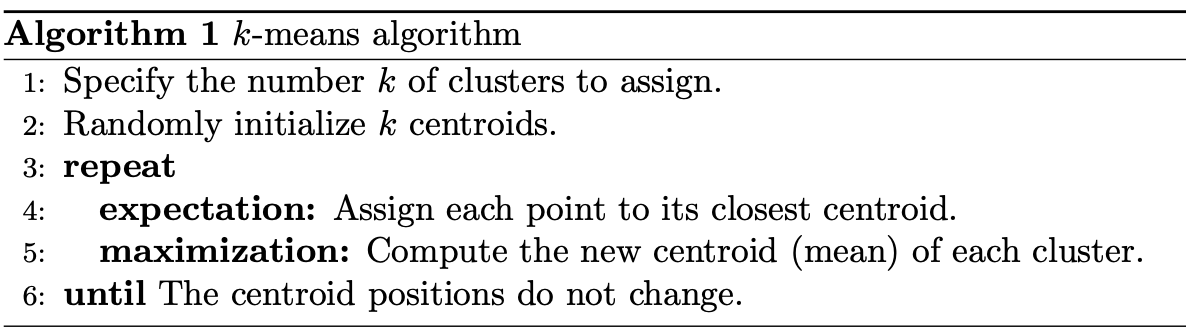

### **Context:**
In today's competitive world, it is crucial to understand customer behaviour and categorise customers based on their demography and buying behaviour. This is broadly one aspect of customer segmentation that allows marketers to better tailor their marketing efforts to various audience subsets in terms of promotional, marketing and product development strategies.
### **Objective**
This article demonstrates the concept of segmentation of a customer dataset from an e-commerce site using k-means clustering in Python. The dataset contains the annual income of ~300 customers and their annual spend on an e-commerce site. We will use the kmeans and the hierarchical clustering algorithms to derive the optimum number of clusters and understand the underlying customer segments based on the data provided.
### **About the dataset**
The dataset consists of Annual income (in USD 000) and their total spend (in USD 000) on an e-commerce site for a period of one year. Let us explore the data using numpy and pandas libraries in Python.

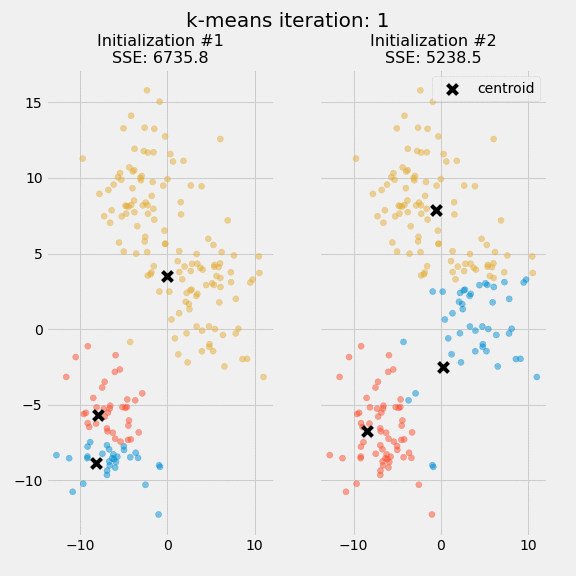

In [89]:
import warnings
warnings.filterwarnings('ignore')

In [90]:
# Load the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Plot styling
import seaborn as sns; sns.set()  # for plot styling

plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [91]:
dataset = pd.read_csv('e:\datafile\CLV.csv')

In [92]:
dataset.head()

,INCOME,SPEND
0,233,150
1,250,187
2,204,172
3,236,178
4,354,163


In [93]:
dataset.shape    # number of rows and columns in the dataframe

(303, 2)

In [94]:
dataset.describe().transpose()    # descriptive statistics of the dataset

,count,mean,std,min,25%,50%,75%,max
INCOME,303.0,245.273927,48.499412,126.0,211.0,240.0,274.0,417.0
SPEND,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0


The dataset consists of 303 rows. The mean annual income is USD 2,45,000 and the mean annual spend is USD 1,49,000. The distribution of the annual income and annual spend has been illustrated with a distplot and violinplot.

Text(0.5, 0, 'Income / spend')

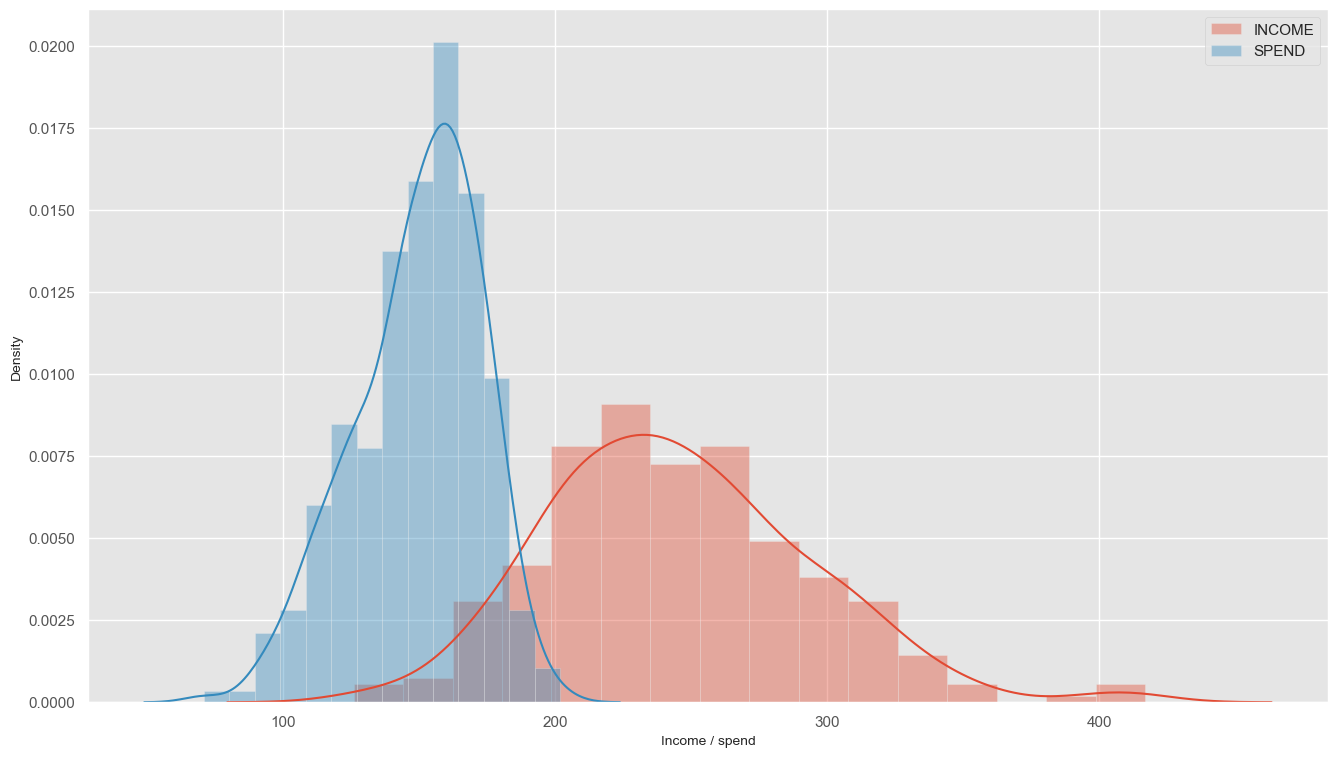

In [95]:
# Visualising the data
plot_income = sns.distplot(dataset["INCOME"], label = "INCOME")
plot_spend = sns.distplot(dataset["SPEND"], label = "SPEND")
plt.legend()
plt.xlabel('Income / spend')

### **What is a Violin Plot?**
A violin plot is a type of data visualization that combines the features of a box plot and a kernel density plot. It is often used to display the distribution of data and to compare multiple distributions side by side.

The violin plot consists of a central box, which represents the interquartile range (IQR) of the data, and a density curve on either side, which represents the estimated probability density function of the data. The shape of the curve resembles a violin, hence the name. The width of the violin at any given point is proportional to the density of data at that point.

Violin plots can be particularly useful when comparing the distributions of different groups of data or when visualizing the distribution of a single variable with many observations. They can also be used to identify outliers and to visualize the presence of multiple modes in the data.

[(0.0, 420.0)]

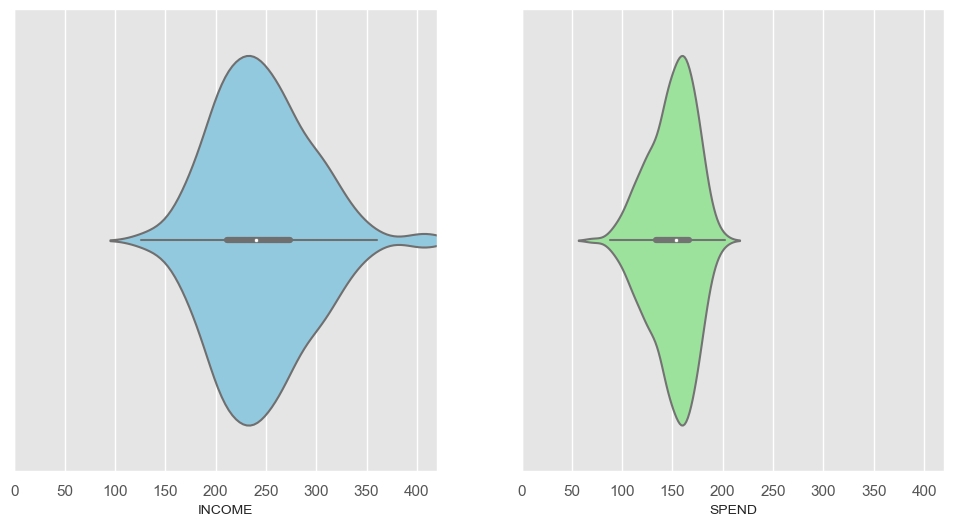

In [96]:
f, axes = plt.subplots(1, 2, figsize = (12, 6), sharex = True, sharey = True)
v1 = sns.violinplot(data = dataset, x = 'INCOME', color = "skyblue", ax = axes[0])
v2 = sns.violinplot(data = dataset, x = 'SPEND', color = "lightgreen", ax = axes[1])
v1.set(xlim = (0, 420))

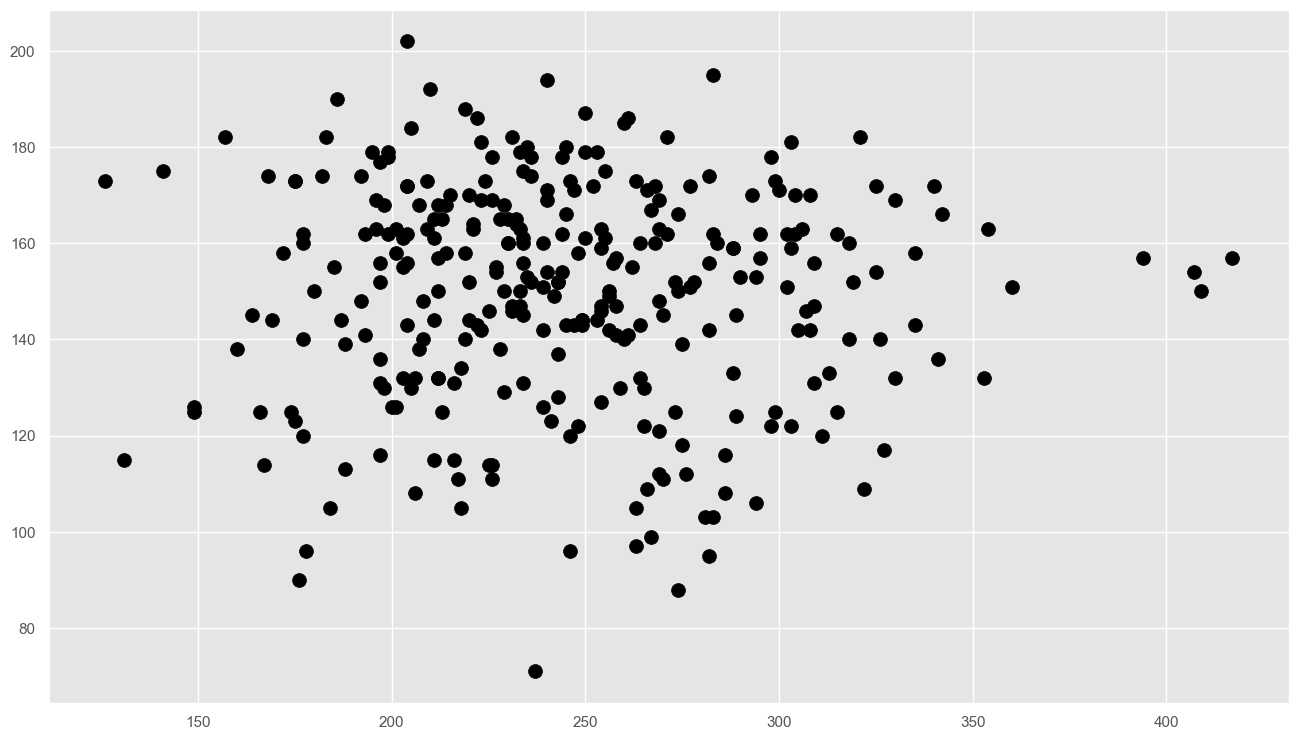

In [97]:
# Plotting the values to understand the spread
Income = dataset['INCOME'].values
Spend = dataset['SPEND'].values
X = np.array(list(zip(Income, Spend)))
plt.scatter(Income, Spend, c = 'black', s = 100)

In [117]:
print (X[:20])

[[-2.00412818  7.85263232]
 [ 0.67047877  4.04094275]
 [-2.26367804  8.27306782]
 [-2.35072954  2.27723705]
 [ 2.22873982  1.14538615]
 [ 0.91433877  4.55014643]
 [ 0.89470026  4.98592215]
 [ 1.81983412 -0.93002217]
 [ 0.90537165  3.89568041]
 [-0.04259341  4.53615561]
 [-2.24675957  7.75951842]
 [ 2.35448169  1.52644695]
 [-1.69299781  3.59222544]
 [-1.27532376  7.88293305]
 [ 1.4955941   1.64365529]
 [-2.34600174  4.08614145]
 [-2.06472585  1.74024306]
 [-1.22538497  7.48810913]
 [ 0.65055319  4.55341736]
 [ 2.38884513  1.43314799]]


### **Clustering fundamentals**

In [100]:
X = dataset.iloc[:, [0, 1]].values
print (X[:10], type(X), X.shape)

[[233 150]
 [250 187]
 [204 172]
 [236 178]
 [354 163]
 [192 148]
 [294 153]
 [263 173]
 [199 162]
 [168 174]] <class 'numpy.ndarray'> (303, 2)


For each value of K, we are calculating **WCSS (Within-Cluster Sum of Square)**. WCSS is the sum of the squared distance between each point and the centroid in a cluster. When we plot the WCSS with the K value, the plot looks like an Elbow. So this plot's name is **"Elbow Plot"**.

### **What is the purpose of WCSS?**
WCSS stands for Within-Cluster Sum of Squares. It is a metric used to evaluate the quality of clustering in K-means clustering algorithm.

The purpose of WCSS is to measure how much the data points within each cluster deviate from the cluster center. Specifically, WCSS is calculated by summing the squared distances between each data point and its assigned cluster center.

The lower the value of WCSS, the better the clustering results, because it means the data points within each cluster are closer to their cluster center. Therefore, the goal of K-means clustering is to minimize the value of WCSS.

WCSS is often used together with the "elbow method" to determine the optimal number of clusters for a given dataset. The elbow method involves plotting the WCSS for different values of K, and looking for the point where the decrease in WCSS begins to level off. This point is referred to as the "elbow", and it represents the optimal number of clusters for the dataset.

In summary, the purpose of WCSS is to help evaluate the quality of K-means clustering by measuring the sum of squared distances between each data point and its assigned cluster center. It is used to determine the optimal number of clusters for a given dataset by plotting the WCSS against different values of K and identifying the elbow point.

> init='k-means++' is a parameter in K-means clustering algorithm that specifies the method for initializing the cluster centers before the iterative optimization process begins.

> The 'k-means++' initialization method is a variation of the random initialization method, which aims to improve the quality and speed of convergence of the K-means algorithm. In the 'k-means++' initialization method, the first cluster center is randomly selected from the data points, and then the remaining cluster centers are selected iteratively based on their distance from the already chosen centers.

> The 'k-means++' initialization method is designed to prevent the algorithm from being stuck in suboptimal solutions that may occur with random initialization. By selecting initial centers based on the distance from each other, the 'k-means++' method tends to generate more diverse initial clusters, leading to better clustering results.

> In summary, init='k-means++' is a parameter in K-means clustering algorithm that specifies the initialization method for the cluster centers, which is a variation of the random initialization method. The 'k-means++' method improves the quality and speed of convergence of the K-means algorithm by selecting initial centers based on the distance from each other, which leads to more diverse initial clusters and better clustering results.

[868805.4785478548, 416914.6776446206, 297101.3764201943, 235568.75630353508, 194388.74977425116, 158865.8346796278, 134701.54102340227, 115291.00712004484, 101407.55282890458, 90780.3120710831]


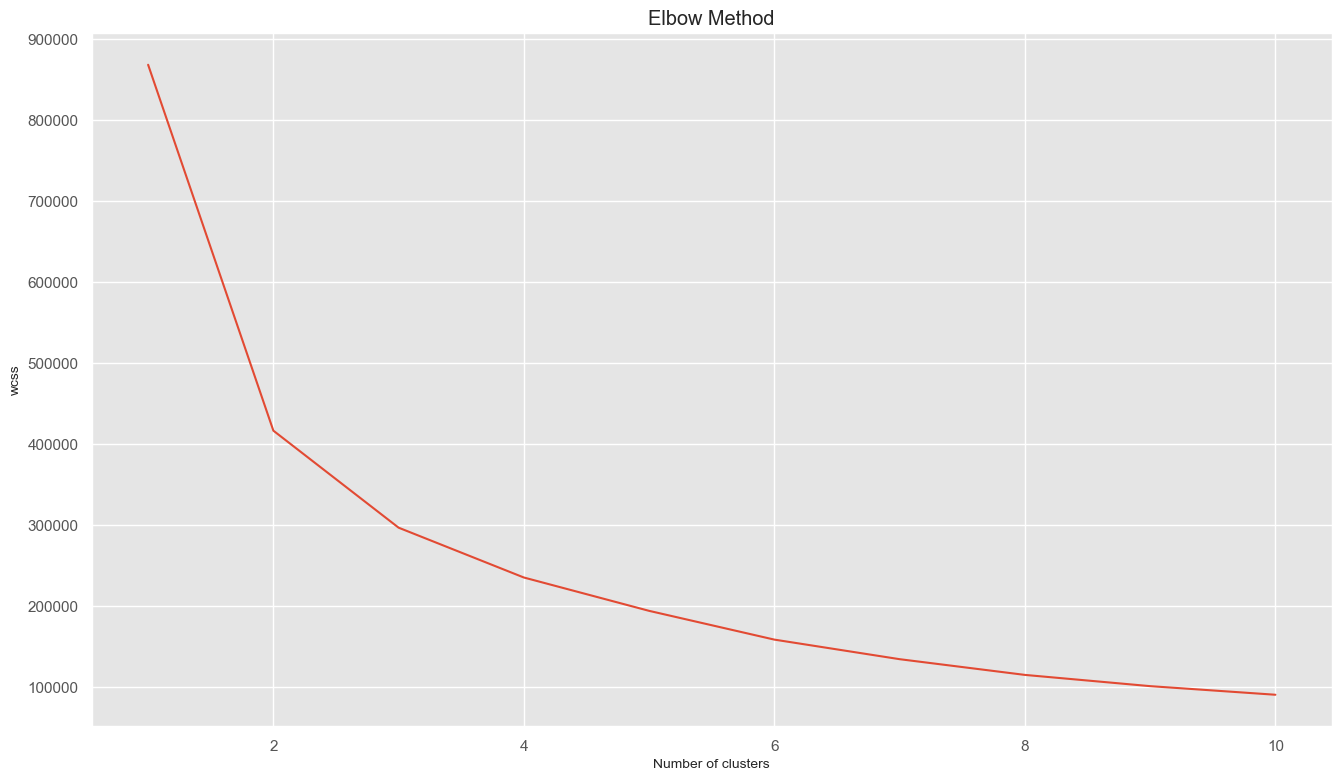

In [101]:
# Using the elbow method to find the ideal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(X)
    wcss.append(km.inertia_)
print (wcss)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

### **What is Elbow method?**
The Elbow method is a technique for determining the optimal number of clusters in a dataset for K-means clustering. The method involves plotting the value of the Within-Cluster Sum of Squares (WCSS) against the number of clusters (K), and then visually inspecting the plot to identify the "elbow" or "bend" in the curve.

The WCSS is calculated as the sum of the squared distances between each data point and its assigned cluster center. As the number of clusters increases, the WCSS generally decreases, since each data point is closer to its assigned cluster center. However, at some point, the marginal decrease in WCSS becomes less significant, and the plot of WCSS against K forms a curve with a clear elbow.

The optimal number of clusters can be chosen as the point on the plot where the decrease in WCSS begins to level off or where the slope of the curve starts to flatten out. The idea is to choose the smallest number of clusters that can explain the majority of the variance in the data.

The Elbow method is a quick and simple technique for determining the optimal number of clusters in a dataset, but it should be used in conjunction with other methods for cluster validation, such as silhouette analysis or gap statistics, to ensure that the chosen number of clusters is appropriate for the given dataset.

### **How to do Hierarchical clustering?**
Hierarchical clustering is a clustering technique that creates a hierarchy of clusters based on the similarity between data points. The two main types of hierarchical clustering are agglomerative clustering and divisive clustering. In agglomerative clustering, we start with individual data points as separate clusters and then iteratively merge them based on their similarity, while in divisive clustering, we start with the entire dataset as a single cluster and then divide it into smaller clusters based on their dissimilarity. Here are the steps to perform agglomerative hierarchical clustering:

* **Choose a distance metric:** The first step in hierarchical clustering is to choose a distance metric that will be used to measure the similarity between data points. Common distance metrics include Euclidean distance, Manhattan distance, and Cosine similarity.

* **Compute the pairwise distances:** Once the distance metric is selected, we compute the pairwise distances between all data points.

* **Create a dendrogram:** A dendrogram is a tree-like diagram that shows the hierarchical relationship between clusters. We can create a dendrogram by merging the two closest clusters based on their distance and repeating this process until all data points are in a single cluster.

* **Determine the optimal number of clusters:** The dendrogram can be used to determine the optimal number of clusters by looking for the longest vertical line that does not cross any horizontal lines. The number of clusters is equal to the number of vertical lines that intersect this line.

* **Cut the dendrogram:** Once the optimal number of clusters is determined, we can cut the dendrogram at the appropriate level to obtain the desired number of clusters.

Hierarchical clustering can be implemented using various libraries in Python such as SciPy, scikit-learn, and more.

### **What is Silhouette?**
Silhouette is a technique for evaluating the quality of clustering in unsupervised machine learning algorithms. It measures how well each data point in a cluster is assigned to its own cluster compared to other clusters.

The Silhouette score ranges from -1 to 1, where a score of 1 indicates that the data point is well-matched to its own cluster and poorly-matched to neighboring clusters, while a score of -1 indicates the opposite. A score of 0 indicates that the data point is on the boundary between two clusters.

The Silhouette score is calculated as the difference between the average distance of a data point to all other points in its own cluster, and the average distance of the same data point to all other points in the nearest neighboring cluster. The score takes into account both the cohesion of the data points within their own cluster and the separation of the data points from other clusters.

A high Silhouette score for a given clustering solution indicates that the clustering is appropriate for the data, and that each data point is assigned to the correct cluster. A low Silhouette score indicates that the clustering may not be optimal, and that the data points could potentially be better assigned to different clusters.

The Silhouette score can be used to evaluate the quality of clustering for different values of K in K-means clustering, as well as other clustering algorithms. It is a useful tool for selecting the optimal number of clusters and comparing different clustering algorithms for a given dataset.

In [102]:
# Calculating the silhoutte coefficient
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters = n_cluster).fit(X)
    label = kmeans.labels_
    sil_coeff = silhouette_score(X, label, metric = 'euclidean')
    print("For n_clusters = {}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

For n_clusters = 2, The Silhouette Coefficient is 0.44006694211403197
For n_clusters = 3, The Silhouette Coefficient is 0.35962629048722355
For n_clusters = 4, The Silhouette Coefficient is 0.37009407867264854
For n_clusters = 5, The Silhouette Coefficient is 0.36268421738156864
For n_clusters = 6, The Silhouette Coefficient is 0.3600499015938843
For n_clusters = 7, The Silhouette Coefficient is 0.35943831289772127
For n_clusters = 8, The Silhouette Coefficient is 0.34821626808850425
For n_clusters = 9, The Silhouette Coefficient is 0.35874452925758954
For n_clusters = 10, The Silhouette Coefficient is 0.34918478380516804


In [103]:
import pylab as pl
from sklearn.decomposition import PCA

Nc = range(1, 20)
kmeans = [KMeans(n_clusters = i) for i in Nc]
kmeans

[KMeans(n_clusters=1),
 KMeans(n_clusters=2),
 KMeans(n_clusters=3),
 KMeans(n_clusters=4),
 KMeans(n_clusters=5),
 KMeans(n_clusters=6),
 KMeans(n_clusters=7),
 KMeans(),
 KMeans(n_clusters=9),
 KMeans(n_clusters=10),
 KMeans(n_clusters=11),
 KMeans(n_clusters=12),
 KMeans(n_clusters=13),
 KMeans(n_clusters=14),
 KMeans(n_clusters=15),
 KMeans(n_clusters=16),
 KMeans(n_clusters=17),
 KMeans(n_clusters=18),
 KMeans(n_clusters=19)]

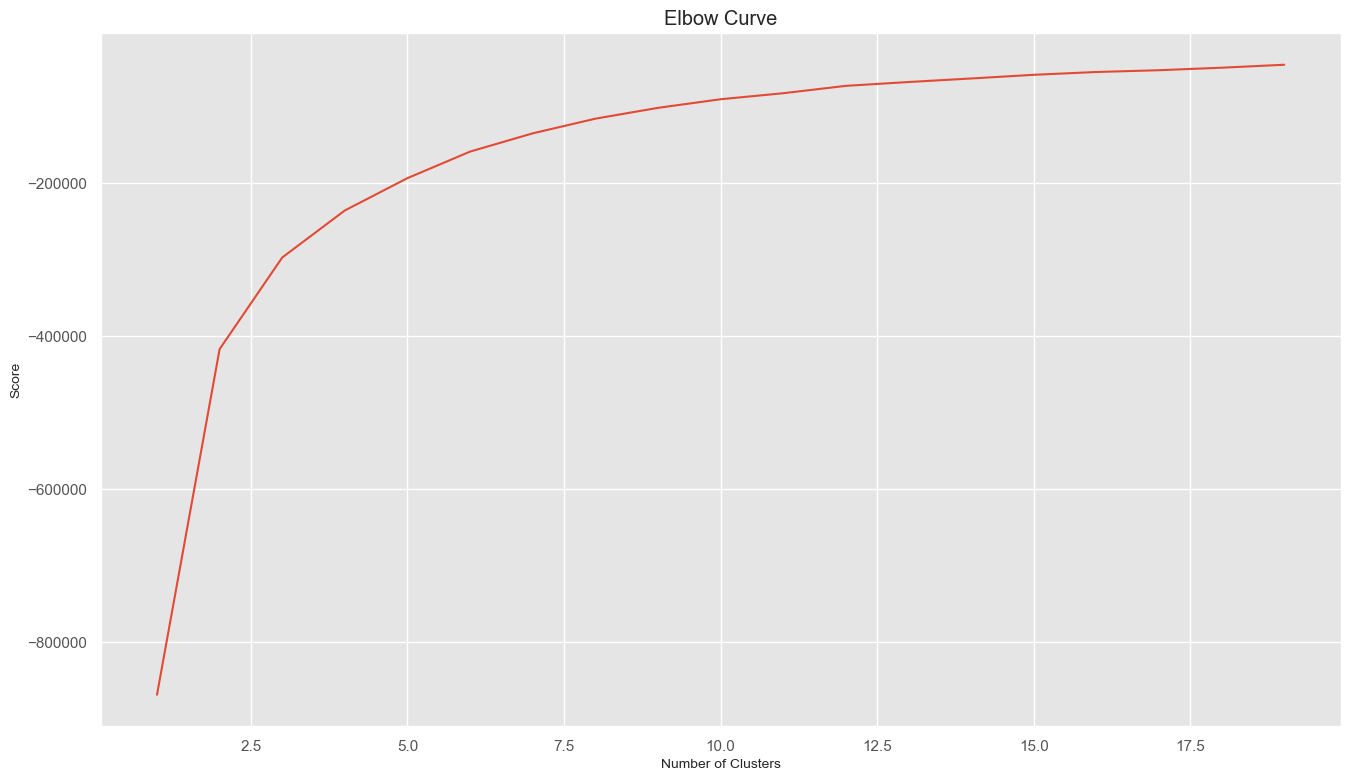

[-868805.4785478548, -416914.6776446206, -297101.3764201943, -235582.59273177007, -193333.5116727564, -158630.56943204787, -134769.07316672688, -115607.58456465532, -101450.40714930404, -90193.7856192771, -82321.04414361683, -72684.91004175718, -67693.47555522555, -63048.71712495664, -58247.44340773334, -54573.70284217488, -52241.198445754744, -48965.95773127055, -45097.20106003546]


In [104]:
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
pl.plot(Nc, score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

print(score)

In [105]:
for k in range (1, 11):
    kmeans_model = KMeans(n_clusters = k, random_state = 1).fit(X)
    labels = kmeans_model.labels_
    interia = kmeans_model.inertia_
    print ("k:", k, "cost:", interia, "labels :", labels[:20])
print()

k: 1 cost: 868805.4785478548 labels : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
k: 2 cost: 416914.6776446206 labels : [1 1 1 1 0 1 0 0 1 1 1 0 0 1 0 1 0 1 1 1]
k: 3 cost: 297101.3764201943 labels : [2 2 1 2 0 1 0 2 1 1 2 2 2 1 2 1 0 2 2 2]
k: 4 cost: 235568.75630353508 labels : [0 0 2 0 1 2 1 0 2 2 0 3 0 2 0 2 1 3 0 0]
k: 5 cost: 193333.51167275637 labels : [1 1 0 1 3 0 3 1 0 0 1 2 1 4 1 0 3 4 1 1]
k: 6 cost: 158999.20745160058 labels : [2 2 1 2 5 1 0 2 1 1 2 3 2 4 0 2 0 4 2 2]
k: 7 cost: 135314.10167803385 labels : [0 0 3 0 4 1 4 0 3 1 0 6 0 5 4 3 4 5 0 0]
k: 8 cost: 115686.57935998778 labels : [5 5 1 5 4 1 2 2 1 1 5 2 2 3 2 5 7 3 5 5]
k: 9 cost: 102546.93727877046 labels : [0 4 5 0 3 5 6 4 5 5 0 1 4 7 6 0 3 7 4 0]
k: 10 cost: 91556.28599714935 labels : [9 1 3 1 8 3 8 4 3 3 1 4 4 5 4 1 8 5 1 9]



In [106]:
# Fitting kmeans to the dataset
km4 = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km4.fit_predict(X)
print(y_means[:20])

[3 3 2 3 1 2 1 3 2 2 3 0 3 2 3 2 1 0 3 3]


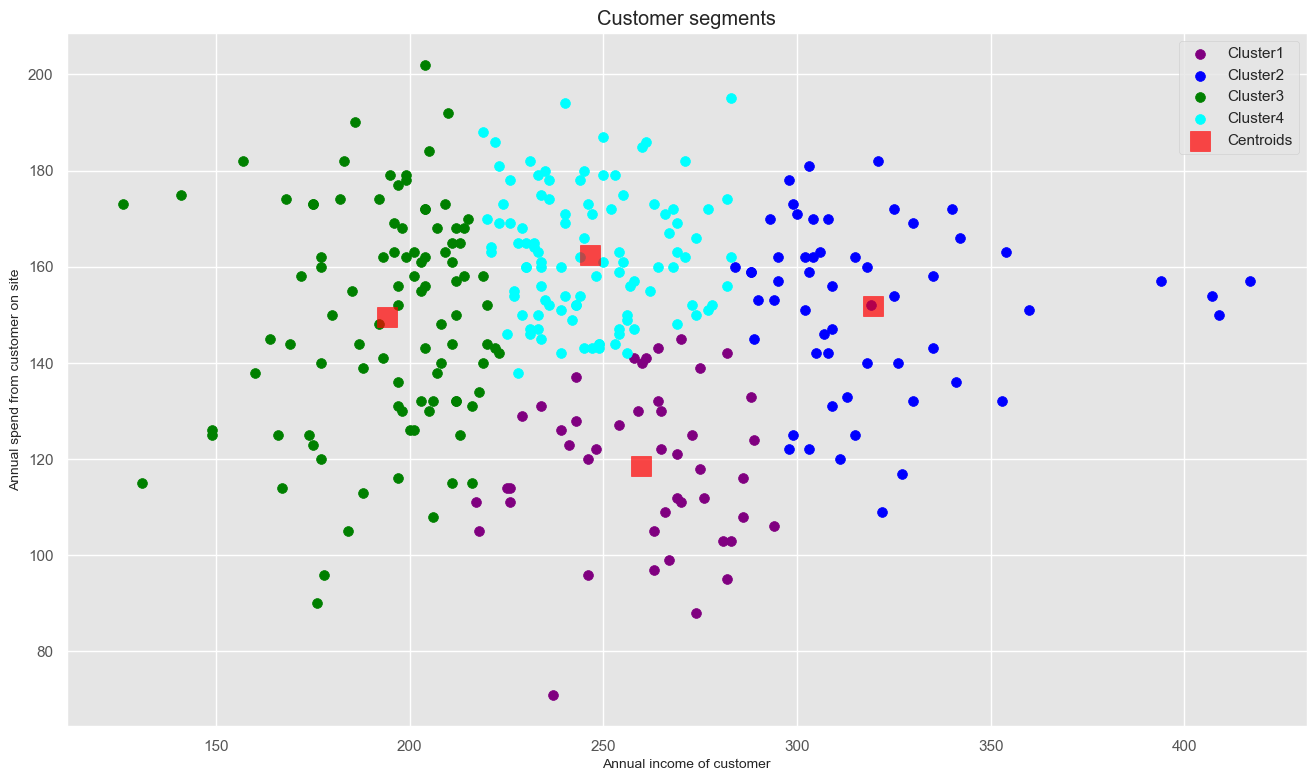

In [107]:
# Visualising the clusters for k=4
plt.scatter(X[y_means == 0, 0],X[y_means == 0, 1], s = 50, c = 'purple', label = 'Cluster1')
plt.scatter(X[y_means == 1, 0],X[y_means == 1, 1], s = 50, c = 'blue', label = 'Cluster2')
plt.scatter(X[y_means == 2, 0],X[y_means == 2, 1], s = 50, c = 'green', label = 'Cluster3')
plt.scatter(X[y_means == 3, 0],X[y_means == 3, 1], s = 50, c = 'cyan', label = 'Cluster4')

plt.scatter(km4.cluster_centers_[:,0], km4.cluster_centers_[:,1], 
            s = 200, marker = 's', c = 'red', alpha = 0.7, label = 'Centroids')
plt.title('Customer segments')
plt.xlabel('Annual income of customer')
plt.ylabel('Annual spend from customer on site')
plt.legend()
plt.show()

In [108]:
# Fitting kmeans to the dataset
km6 = KMeans(n_clusters = 6, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km6.fit_predict(X)
print(y_means[:20])

[4 4 3 4 5 3 2 4 3 3 4 0 4 1 2 4 5 1 4 4]


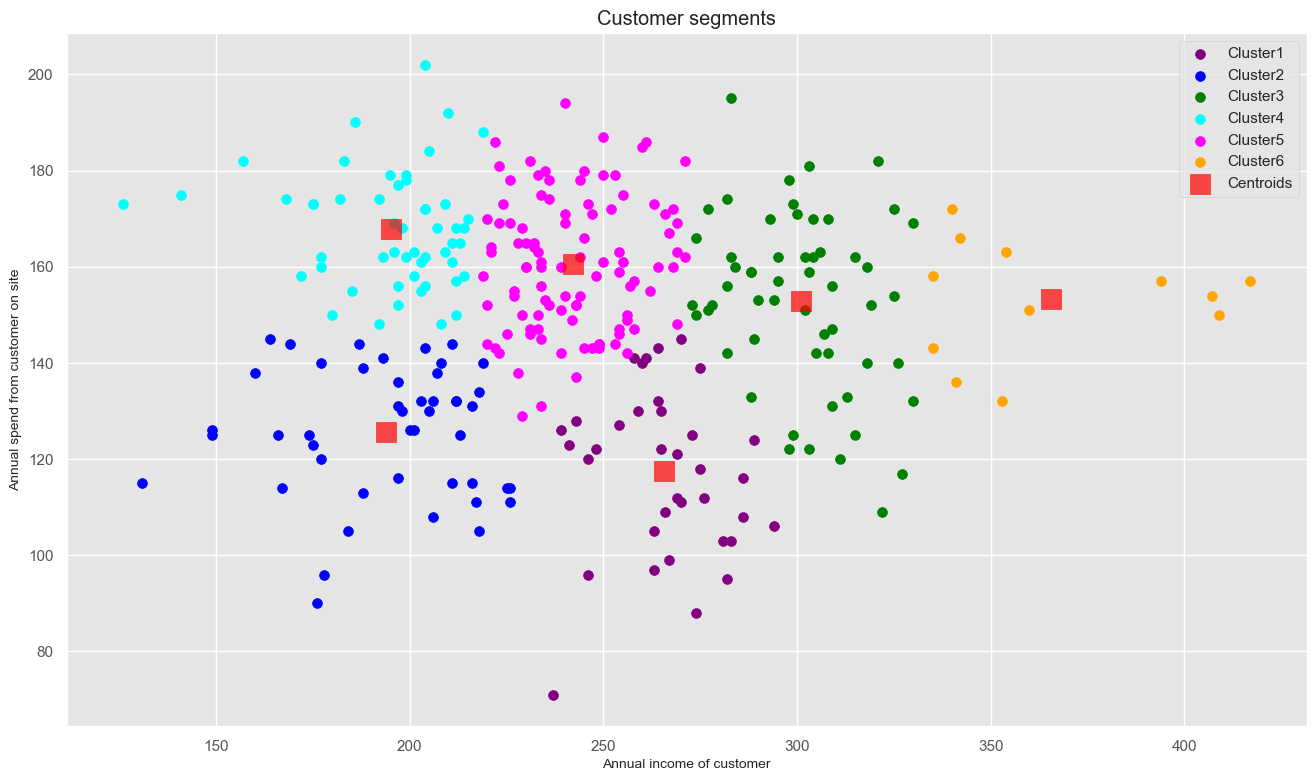

In [109]:
# Visualising the clusters
plt.scatter(X[y_means == 0, 0], X[y_means == 0, 1], s = 50, c = 'purple', label = 'Cluster1')
plt.scatter(X[y_means == 1, 0], X[y_means == 1, 1], s = 50, c = 'blue', label = 'Cluster2')
plt.scatter(X[y_means == 2, 0], X[y_means == 2, 1], s = 50, c = 'green', label= 'Cluster3')
plt.scatter(X[y_means == 3, 0], X[y_means == 3, 1], s = 50, c = 'cyan', label= 'Cluster4')
plt.scatter(X[y_means == 4, 0], X[y_means == 4, 1], s = 50, c = 'magenta', label= 'Cluster5')
plt.scatter(X[y_means == 5, 0], X[y_means == 5, 1], s = 50, c = 'orange', label = 'Cluster6')

plt.scatter(km6.cluster_centers_[:, 0], km6.cluster_centers_[:, 1], 
            s = 200, marker = 's', c = 'red', alpha = 0.7, label = 'Centroids')
plt.title('Customer segments')
plt.xlabel('Annual income of customer')
plt.ylabel('Annual spend from customer on site')
plt.legend()
plt.show()

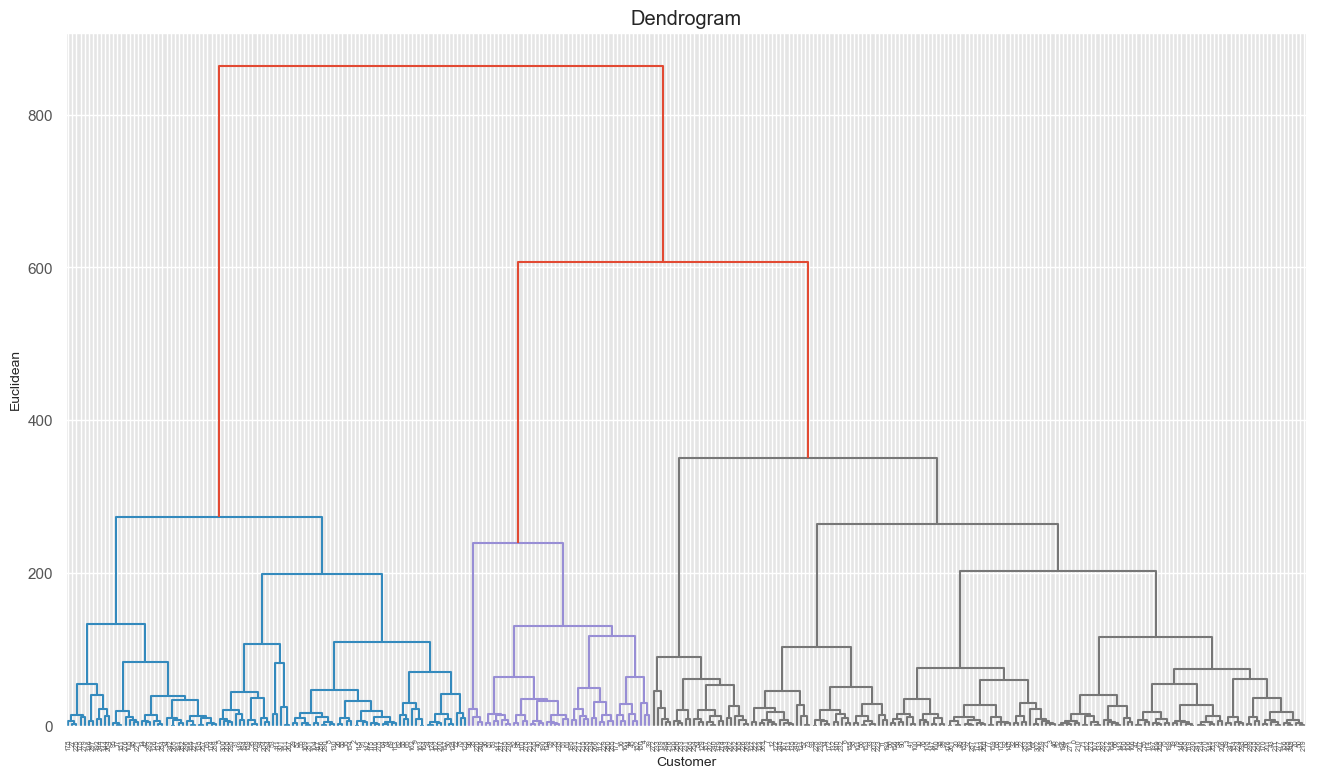

In [110]:
# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dend = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title("Dendrogram")
plt.xlabel('Customer')
plt.ylabel('Euclidean')
plt.show()

In [111]:
# Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward' )
y_hc = hc.fit_predict(X)
print (y_hc[:20], type(y_hc), y_hc.shape)

[0 0 1 0 2 1 0 0 1 1 0 0 0 1 0 1 2 1 0 0] <class 'numpy.ndarray'> (303,)


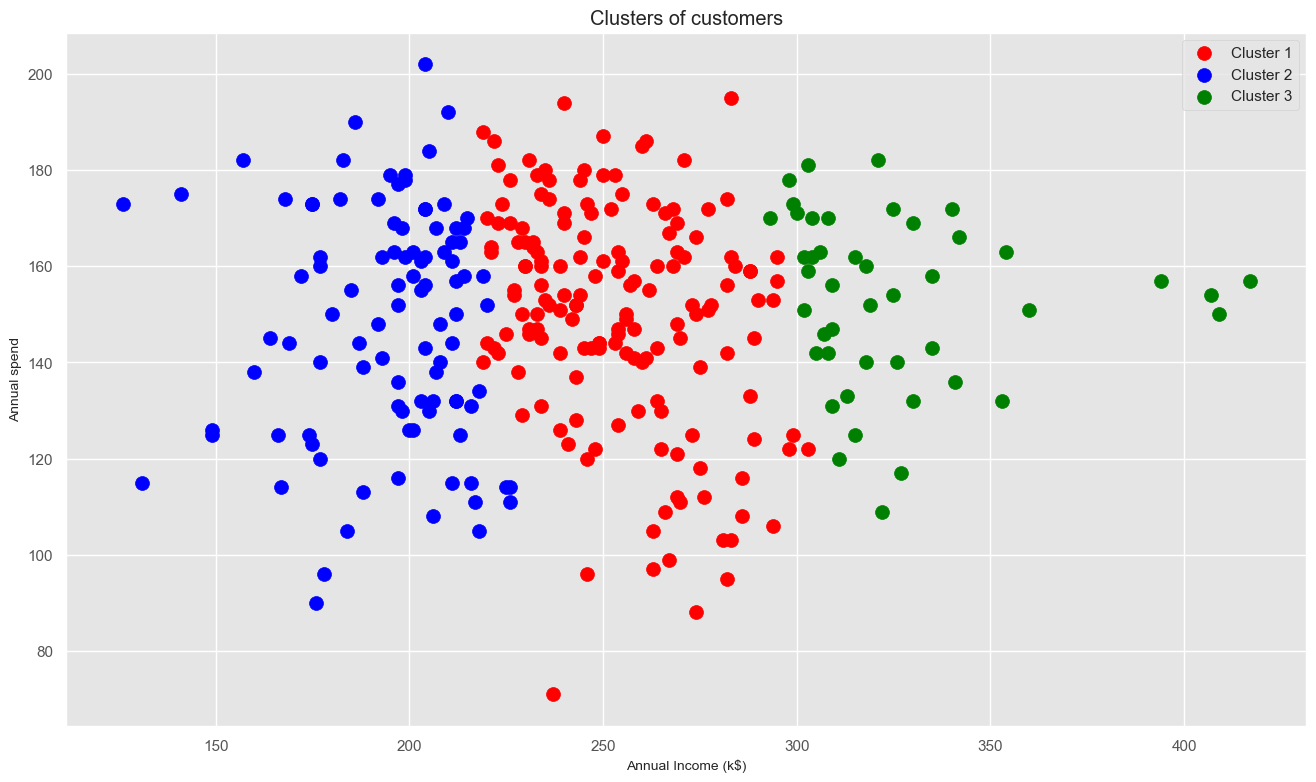

In [112]:
# Visualising the clusters
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
# plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
# plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
# plt.scatter(X[y_hc == 5, 0], X[y_hc == 5, 1], s = 100, c = 'orange', label = 'Cluster 6')

plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Annual spend')
plt.legend()
plt.show()

In [115]:
# Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 6, affinity = 'euclidean', linkage = 'ward' )
y_hc = hc.fit_predict(X)
print (y_hc[:20], type(y_hc), y_hc.shape)

[4 5 4 1 0 2 2 0 5 2 3 0 1 3 0 1 1 3 2 0] <class 'numpy.ndarray'> (1000,)


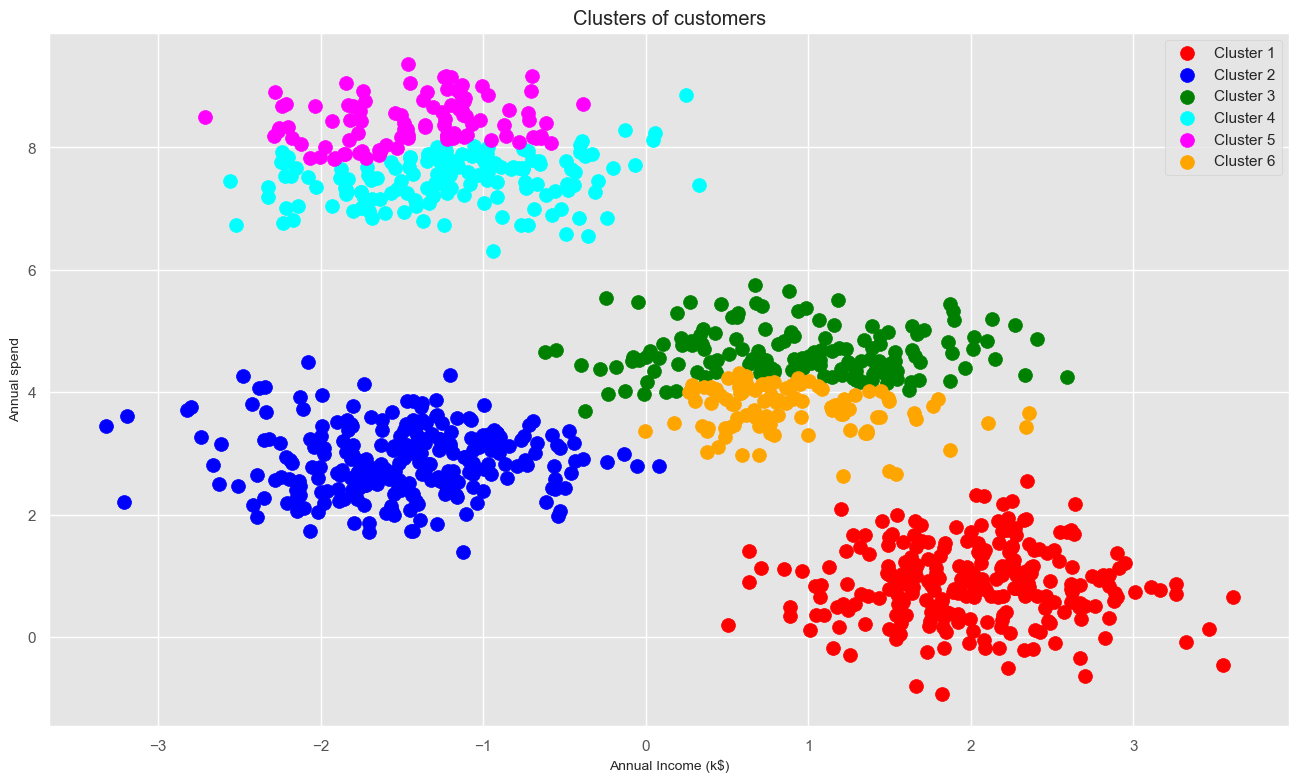

In [116]:
# Visualising the clusters
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(X[y_hc == 5, 0], X[y_hc == 5, 1], s = 100, c = 'orange', label = 'Cluster 6')

plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Annual spend')
plt.legend()
plt.show()

### **How to do Density-based clustering?**
Density-based clustering is a clustering technique that groups together data points that are close together in terms of their density. One of the most popular density-based clustering algorithms is DBSCAN (Density-Based Spatial Clustering of Applications with Noise). Here are the steps to perform DBSCAN clustering:

Choose the parameters: The first step in DBSCAN clustering is to choose the appropriate values for the two main parameters: epsilon (ε) and minimum points (minPts). Epsilon is the radius within which we search for neighboring points, while minPts is the minimum number of points that must be within epsilon distance of a core point.

Identify core points: A data point is considered a core point if it has at least minPts neighboring points within a distance of ε.

Find density-reachable points: A data point is considered density-reachable from another core point if it is within ε distance of that core point and has at least minPts neighboring points within its own radius.

Form clusters: DBSCAN clustering forms clusters by assigning each core point and its density-reachable points to the same cluster. If a data point is not a core point and is not density-reachable from any core point, it is considered an outlier or noise.

DBSCAN clustering can be implemented using various libraries in Python such as scikit-learn, ELKI, and more. It is important to note that the choice of parameters ε and minPts can have a significant impact on the clustering results, and they should be chosen carefully based on the specific problem and the characteristics of the data.

### **Python implementation of DBSCAN**
Here is an example of how to implement DBSCAN clustering in Python using scikit-learn library:

[ 0  1  0  1  2  1  1 -1  1  1  0  2  1  0  2  1  1  0  1  2] 1000 4
Number of clusters: 3


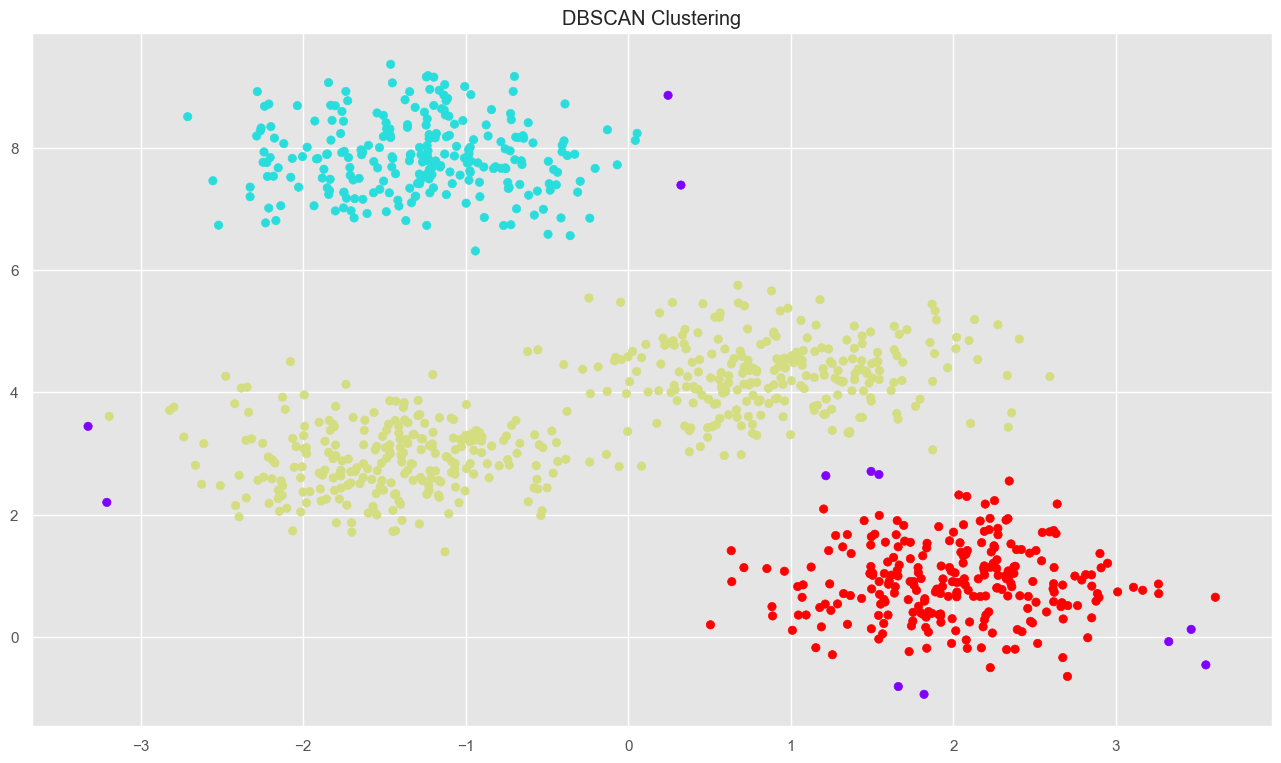

In [114]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Generate random data points
X, _ = make_blobs(n_samples = 1000, centers = 4, cluster_std = 0.6, random_state = 0)

# Perform DBSCAN clustering
dbscan = DBSCAN(eps = 0.5, min_samples = 5)
dbscan.fit(X)

# Get the labels and number of clusters
labels = dbscan.labels_
print (labels[:20], len(labels), len(set(labels)))
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print('Number of clusters:', n_clusters)

# Plot the results
plt.scatter(X[:, 0], X[:, 1], c = labels, cmap = 'rainbow')
plt.title('DBSCAN Clustering')
plt.show()

In this example, we first generate some random data points using the **make_blobs** function from scikit-learn. Then, we create a **DBSCAN** object and specify the value of epsilon (**eps**) and minimum points (**min_samples**). We fit the model to the data using the **fit** method and obtain the cluster labels using the **labels_** attribute. Finally, we plot the results using the **scatter** function from matplotlib.

Note that in this example, we set the value of **eps** and **min_samples** based on trial and error. In practice, it may be necessary to experiment with different values of these parameters to obtain the desired clustering results.